In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5212 - accuracy: 0.8191 - val_loss: 0.4284 - val_accuracy: 0.8489
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3850 - accuracy: 0.8626 - val_loss: 0.3805 - val_accuracy: 0.8627
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3481 - accuracy: 0.8746 - val_loss: 0.3690 - val_accuracy: 0.8678
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3186 - accuracy: 0.8837 - val_loss: 0.3837 - val_accuracy: 0.8643
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3020 - accuracy: 0.8880 - val_loss: 0.3451 - val_accuracy: 0.8763
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2832 - accuracy: 0.8945 - val_loss: 0.3174 - val_accuracy: 0.8860
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2722 - accuracy: 0.8996 - val_loss: 0.3282 - val_accuracy:

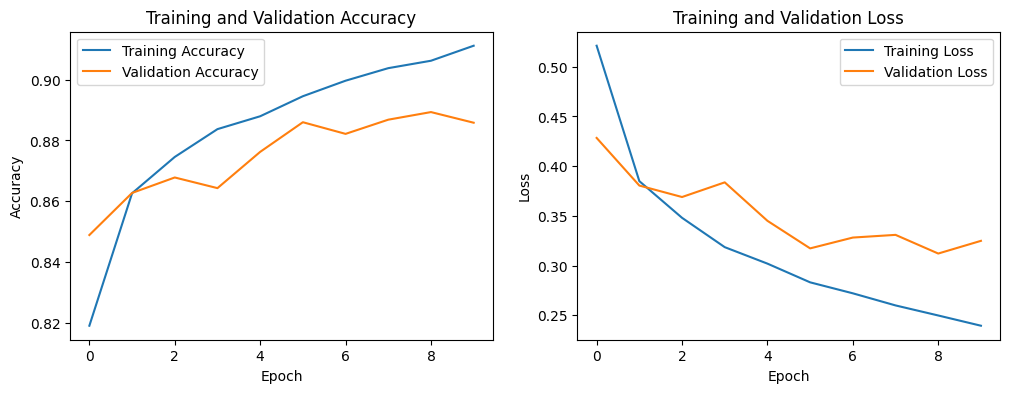

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



Epoch 1/10
1500/1500 [==============================] - 42s 27ms/step - loss: 0.4142 - accuracy: 0.8540 - val_loss: 0.3159 - val_accuracy: 0.8889
Epoch 2/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2758 - accuracy: 0.8995 - val_loss: 0.2690 - val_accuracy: 0.9026
Epoch 3/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2296 - accuracy: 0.9162 - val_loss: 0.2589 - val_accuracy: 0.9053
Epoch 4/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1944 - accuracy: 0.9281 - val_loss: 0.2496 - val_accuracy: 0.9128
Epoch 5/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1664 - accuracy: 0.9372 - val_loss: 0.2412 - val_accuracy: 0.9133
Epoch 6/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1414 - accuracy: 0.9469 - val_loss: 0.2421 - val_accuracy: 0.9150
Epoch 7/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1196 - accuracy: 0.9559 - val_loss: 0.2619 -

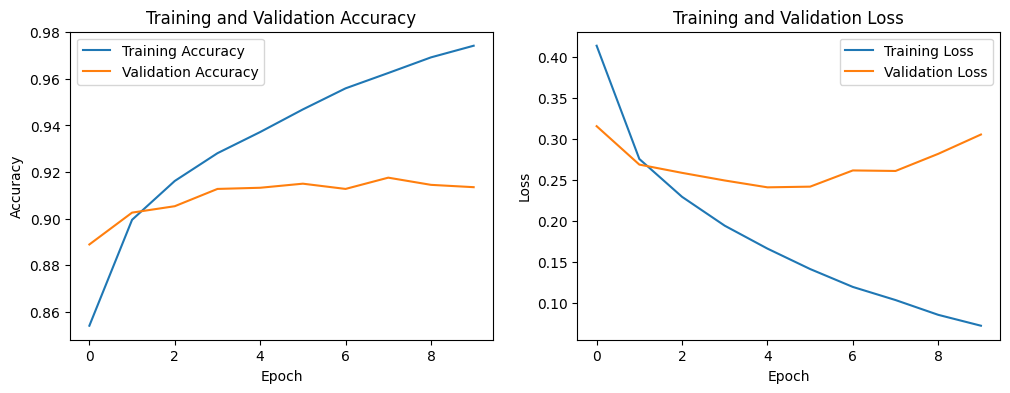

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

(train_images_cnn, train_labels_cnn), (test_images_cnn, test_labels_cnn) = fashion_mnist.load_data()

# dans le code ci dessous je veux normaliser les images [0,1]
train_images_cnn = train_images_cnn / 255.0
test_images_cnn = test_images_cnn / 255.0

# Redimensionnement des images pour le CNN
train_images_cnn = train_images_cnn.reshape(-1, 28, 28, 1)
test_images_cnn = test_images_cnn.reshape(-1, 28, 28, 1)

# Création du modèle CNN
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer=Adam(),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

# Entraînement du modèle
cnn_history = cnn_model.fit(train_images_cnn, train_labels_cnn, epochs=10, validation_split=0.2)

# Évaluation du modèle
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images_cnn, test_labels_cnn)
print(f"Accuracy on test data: {cnn_test_acc}")

# Visualisation de la précision et de la perte pendant l'entraînement
plt.figure(figsize=(12, 4))

# Graphique pour la précision
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Graphique pour la perte
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
